In [7]:
from sklearn.pipeline import * 
from sklearn.naive_bayes import * 
from sklearn.cluster import *  
from sklearn.covariance import *  
from sklearn.cross_decomposition import *  
from sklearn.datasets import *  
from sklearn.decomposition import *  
from sklearn.ensemble import *  
from sklearn.feature_extraction import *  
from sklearn.feature_extraction.text import *  
from sklearn.feature_selection import *  
from sklearn.gaussian_process import *  
from sklearn.linear_model import *  
from sklearn.manifold import *  
from sklearn.metrics import *  
from sklearn.mixture import *  
from sklearn.model_selection import *  
from sklearn.neighbors import *  
from sklearn.neural_network import *  
from sklearn.preprocessing import *  
#from sklearn_pandas import DataFrameMapper
from sklearn.svm import *  
from sklearn.tree import *  

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [8]:
filepath = "code/data/breast_cancer.csv"

In [9]:
f = pd.read_csv(filepath)
f

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
y = f["M"]
data = f.drop("M", axis = 1)

In [11]:
data,y

(       842302  17.99  10.38   122.8    1001   0.1184   0.2776   0.3001  \
 0      842517  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690   
 1    84300903  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740   
 2    84348301  11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140   
 3    84358402  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800   
 4      843786  12.45  15.70   82.57   477.1  0.12780  0.17000  0.15780   
 ..        ...    ...    ...     ...     ...      ...      ...      ...   
 563    926424  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390   
 564    926682  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400   
 565    926954  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251   
 566    927241  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140   
 567     92751   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000   
 
       0.1471  0.2419  ...   25.38  17.33   184.6    2019   0.1622   0.6656  \
 0    0.07017  0.18

In [13]:
scaler = StandardScaler()
X = scaler.fit_transform(data)
X

array([[-0.2366231 ,  1.83208378, -0.35832707, ...,  1.09526221,
        -0.24044363,  0.28529387],
       [ 0.4309669 ,  1.58210603,  0.45385958, ...,  1.96646779,
         1.16385786,  0.2053006 ],
       [ 0.43134604, -0.76711673,  0.25081292, ...,  2.18809026,
         6.08623563,  4.95045676],
       ...,
       [-0.23594768,  0.70434323,  2.04789258, ...,  0.41969578,
        -1.10613122, -0.31576665],
       [-0.23594539,  1.84060575,  2.33962629, ...,  2.30272257,
         1.93516598,  2.22846365],
       [-0.24262053, -1.80679694,  1.22170271, ..., -1.74761915,
        -0.04354852, -0.74961903]])

In [14]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size =0.3, random_state=0)

In [19]:
model = LogisticRegression ()

In [20]:
m = model.fit(X_train,y_train)

In [21]:
m

LogisticRegression()

In [22]:
m.score(X_train,y_train) #training score

0.9899244332493703

In [23]:
m.score(X_test, y_test) #test score

0.9766081871345029

In [24]:
m.predict(X_test)

array(['B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M',
       'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'B', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B'], dtype=object)

In [26]:
confusion_matrix(y_train, m.predict(X_train))

array([[245,   0],
       [  4, 148]])

**23 B**

In [38]:
enc = LabelEncoder()
y = enc.fit_transform(f["M"])
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [39]:
data = f.drop("M", axis =1)

In [40]:
scaler = MinMaxScaler()
X = scaler.fit_transform(data)
X

array([[9.14996350e-04, 6.43144493e-01, 2.72573554e-01, ...,
        6.39175258e-01, 2.33589592e-01, 2.22878132e-01],
       [9.24954884e-02, 6.01495575e-01, 3.90260399e-01, ...,
        8.35051546e-01, 4.03705894e-01, 2.13433032e-01],
       [9.25474992e-02, 2.10090397e-01, 3.60838688e-01, ...,
        8.84879725e-01, 1.00000000e+00, 7.73711137e-01],
       ...,
       [1.00765069e-03, 4.55251077e-01, 6.21237741e-01, ...,
        4.87285223e-01, 1.28720678e-01, 1.51908697e-01],
       [1.00796562e-03, 6.44564343e-01, 6.63510315e-01, ...,
        9.10652921e-01, 4.97141731e-01, 4.52315361e-01],
       [9.22636984e-05, 3.68687586e-02, 5.01521813e-01, ...,
        0.00000000e+00, 2.57441356e-01, 1.00682146e-01]])

In [41]:
scaler

MinMaxScaler()

In [42]:
pca = PCA(n_components =1)
sel = SelectKBest(chi2, k =1)
feats = FeatureUnion([("sel",sel),("pca", pca)])

In [43]:
lr = LogisticRegression()

In [44]:
pipeline = Pipeline([("cf",feats),("lr",lr)])

In [45]:
pipeline

Pipeline(steps=[('cf',
                 FeatureUnion(transformer_list=[('sel',
                                                 SelectKBest(k=1,
                                                             score_func=<function chi2 at 0x000001A41499D9E0>)),
                                                ('pca', PCA(n_components=1))])),
                ('lr', LogisticRegression())])

In [46]:
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size =0.3)

In [47]:
param_grid = dict(lr__C=[0.1, 1, 10],  cf__pca__n_components=[1,2])

In [48]:
m = RandomizedSearchCV(pipeline,param_grid, cv =5 )

In [49]:
m.fit(X_train,y_train)

C:\Users\Sreyas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('cf',
                                              FeatureUnion(transformer_list=[('sel',
                                                                              SelectKBest(k=1,
                                                                                          score_func=<function chi2 at 0x000001A41499D9E0>)),
                                                                             ('pca',
                                                                              PCA(n_components=1))])),
                                             ('lr', LogisticRegression())]),
                   param_distributions={'cf__pca__n_components': [1, 2],
                                        'lr__C': [0.1, 1, 10]})

In [50]:
best_model = m.best_estimator_

In [51]:
best_model.predict(X_test)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [52]:
roc_auc_score(y_train, best_model.predict(X_train), average = "macro")

np.float64(0.9464400514304082)

In [65]:
y_prob = best_model.predict_proba(X_test)[:, 1]

In [66]:
fpr,tpr,thresholds = roc_curve(y_test,y_prob)

In [67]:
roc_auc = auc(fpr,tpr) 

In [68]:
roc_auc

np.float64(0.9806225205981081)

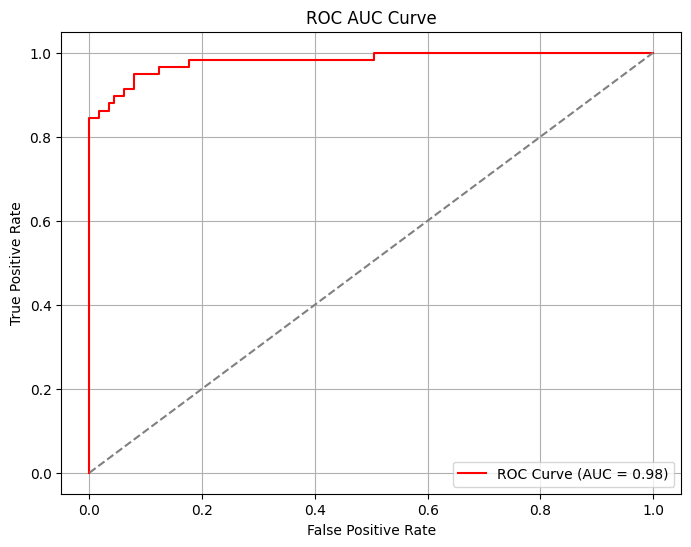

In [70]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [53]:
confusion_matrix(y_train, best_model.predict(X_train))

array([[237,   7],
       [ 12, 141]])